# SHAP ANALYSIS - NOUAR Alexandre & DURA Théo

## Imports :

In [36]:
import shap
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

import mlflow
from xgboost import XGBClassifier

shap.initjs()

### Model import :

In [3]:
xgb = pickle.load(open('../models/best_XGB_model.pkl', 'rb'))

### Data & Predictions import :

In [31]:
pred = pd.read_csv("../predictions/XGB_predictions.csv")
data = pd.read_csv("../data/processed/test_data.csv")

sampled_data = data.sample(n=100)

features_names = data.columns

## Using Shap to explain our XGBOOST model and predictions :

Building a TreeExplainer and compute shap values in a sample of the test dataset.

In [14]:
explainer = shap.TreeExplainer(xgb)

shap_values = explainer.shap_values(sampled_data)

Visualize explanations for a specific point of the sampled dataset.

In [42]:
i = 0 #change this value to see another specific point of the dataset.
shap.force_plot(explainer.expected_value,shap_values[i],features=sampled_data.iloc[i], feature_names=features_names)

Visualize explanations for all point of the sampled dataset.

In [33]:
shap.force_plot(explainer.expected_value,shap_values, features=sampled_data, feature_names=features_names)

Visualize the summary plot for each class.

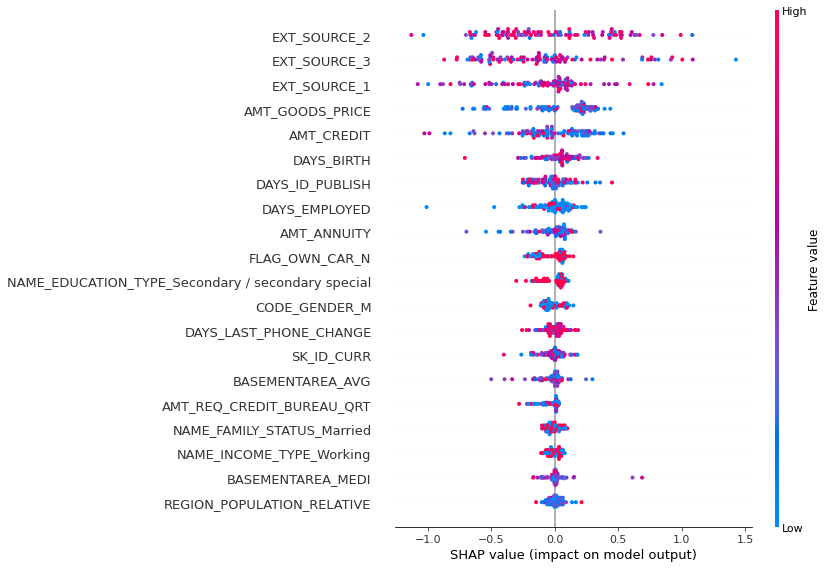

In [32]:
shap.summary_plot(shap_values, features=sampled_data, feature_names=features_names)